In [76]:
import random
import networkx as nx
from matplotlib import pyplot as plt
from collections import Counter
import math
from utils.plotTools import plot_qwak


def random_walk(graph, start_node, num_steps=10, num_walks=1):
    walks = []
    for _ in range(num_walks):
        walk = [start_node]
        for _ in range(num_steps):
            neighbors = list(nx.neighbors(graph, walk[-1]))
            if neighbors:
                next_node = random.choice(neighbors)
                walk.append(next_node)
            else:
                break
        walks.append(walk)
    return walks


def walks_to_frequency(graph, walks):
    # Concatenate all the walks into a single list
    all_walks = [node for walk in walks for node in walk]
    
    # Count the occurrences of each node
    counter = Counter(all_walks)
    
    # Convert the counter to a list of frequencies
    frequency = [0]*len(graph.nodes)
    for node, count in counter.items():
        frequency[node] = count
    return frequency

def frequency_to_probability(frequency):
    total_steps = sum(frequency)
    probability = [f / total_steps for f in frequency]
    return probability

In [42]:
n = 200
G = nx.path_graph(n)
start_node = n//2
walk = random_walk(G, start_node, num_steps=200, num_walks=500)
frequency = walks_to_frequency(G, walk)
probability = frequency_to_probability(frequency)


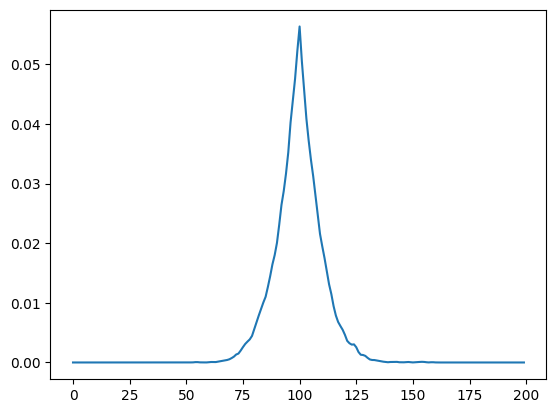

In [43]:
plt.plot(probability)

# Cover time

In [44]:
import random
import networkx as nx

def estimate_cover_time(graph, start_node, num_simulations=1000):
    total_steps = 0

    for _ in range(num_simulations):
        visited = set()
        current_node = start_node

        while len(visited) < len(graph.nodes):
            visited.add(current_node)
            neighbors = list(nx.neighbors(graph, current_node))
            current_node = random.choice(neighbors)
            total_steps += 1

    # Average the total steps over the number of simulations
    return total_steps / num_simulations

# Example usage
G = nx.cycle_graph(10)
start_node = random.choice(list(G.nodes))
cover_time = estimate_cover_time(G, start_node, num_simulations=1000)
print("Estimated Cover Time:", cover_time)


Estimated Cover Time: 46.325


In [62]:
def estimate_cover_time(graph_list, num_simulations=1000):
    cover_times = []

    for graph in graph_list:
        total_steps = 0

        for _ in range(num_simulations):
            visited = set()
            start_node = random.choice(list(graph.nodes))
            current_node = start_node

            while len(visited) < len(graph.nodes):
                visited.add(current_node)
                neighbors = list(nx.neighbors(graph, current_node))
                current_node = random.choice(neighbors)
                total_steps += 1

        # Average the total steps over the number of simulations
        average_cover_time = total_steps / num_simulations
        cover_times.append(average_cover_time)
    return cover_times

def complete_graph_cover_time(n_range):
    cover_times = []
    for n in n_range:
        cover_times.append(n * math.log(n))
    return cover_times

In [65]:
n_range = range(5, 100)
graph_list = [nx.complete_graph(n) for n in n_range]
cover_times_random_walk_complete = estimate_cover_time(graph_list, num_simulations=100)
estimate_complete_cover_time = complete_graph_cover_time(n_range)

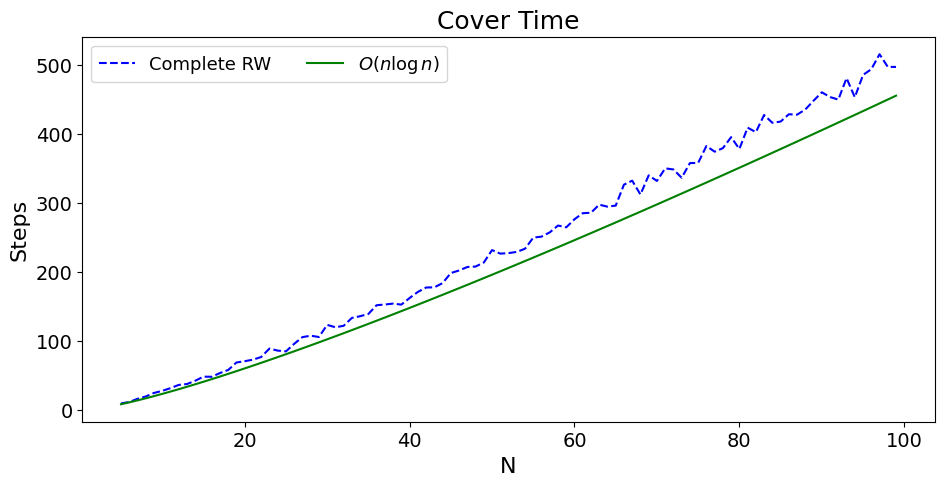

In [84]:
alphaLabelList = [r'Complete RW',r'$O(n\log n)$']

params = {
    'font_size' : 14,
    'figsize': (11, 5),
    'plot_title' : f'Cover Time',
    'x_label' : 'N',
    'y_label' : "Steps",
    'legend_labels' : alphaLabelList,
    'legend_loc': "best",
    # 'legend_title' : r'$\alpha$',
    'legend_ncol' : 3,
    'color_list' : ['#0000FF', '#008000', '#525252'],
    'line_style_list' : ['--', '-','-.' ],
    # 'save_path' : f'Output/OrientedDynamics/orientedDynamics_N{N}_NWALKS{len(alphaList)}_Alphas{str([round(a, 2) for a in alphaList]).replace(", ", "-").replace("[", "").replace("]", "")}_TMAX{round(t)}.png',
    'use_loglog': False,
    'use_cbar' : False,
    'cbar_label' : None, 
    'cbar_ticks' : None,
    'cbar_tick_labels' : None,
    'x_lim' : None,
    # 'x_num_ticks' : 7,
    # 'y_num_ticks' : 7,
    # 'x_round_val' : 1,
    # 'y_round_val' : 3,
}

node_value_matrix = list(range(5,100))
plot_qwak(x_value_matrix = [list(range(5,100)),list(range(5,100))] , y_value_matrix = [cover_times_random_walk_complete,estimate_complete_cover_time],**params)

In [71]:
def lollipop_graph_cover_time(n_range):
    cover_times = []
    for n in n_range:
        cover_times.append(n ** 3)
    return cover_times

In [85]:
m_range = range(5, 50)
n_range = range(5, 25)
sum_range = range(min(m_range) + min(n_range), max(m_range) + max(n_range) + 1)
print(sum_range)

graph_list = [nx.lollipop_graph(m,n) for m,n in zip(m_range,n_range)]
cover_times_random_walk_lollipop = estimate_cover_time(graph_list, num_simulations=100)
estimate_lollipop_cover_time = lollipop_graph_cover_time(n_range)

range(10, 49)


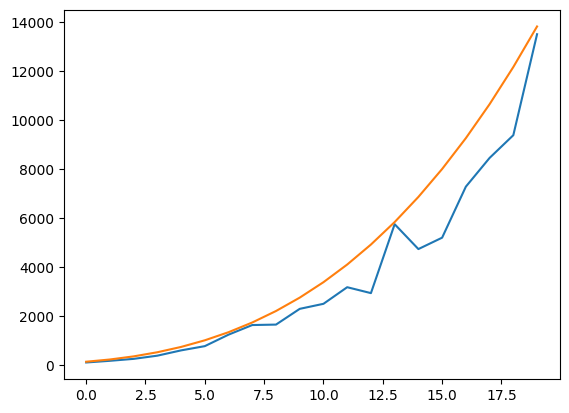

In [73]:
plt.plot(cover_times_random_walk_lollipop)
plt.plot(estimate_lollipop_cover_time)